In [707]:
import pandas as pd
import  numpy  as  np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from pandas_ml import ConfusionMatrix
from scipy.fftpack import fft
from geopandas import GeoDataFrame
import geopandas
from shapely.geometry import Point
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [708]:
raw_data_file_name= "Data_to_Clustered/dilum_sir_route_without_duplications_Fourier.json"
raw_data = pd.read_json(raw_data_file_name)
raw_data.head(5)

,anomaly,lat,lon
0,A,6.765363,79.948124
1,A,6.760512,79.947796
2,A,6.760431,79.947789
3,A,6.757848,79.951910
4,A,6.751866,79.954972


In [709]:
raw_data.shape

(6008, 3)

In [710]:
#features = ['lat','lon',]
#coordinates = raw_data[features]
#coordinates.head()

In [711]:
#coordinates.shape

In [712]:
#coordinates['coordinates'] = list(zip(coordinates.lon, coordinates.lat))

In [713]:
#coordinates.head()

In [714]:
#coordinates['coordinates'] = coordinates['coordinates'].apply(Point)

In [715]:
#coordinates.head()

In [716]:
#gdf = GeoDataFrame(coordinates, geometry='coordinates')
#gdf.plot()

In [717]:
#print(gdf.head())

In [718]:
#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
#ax = world[world.continent == 'Asia'].plot(
    #color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
#gdf.plot(ax=ax, color='red')

#plt.show()

In [719]:
#gdf.plot()

In [720]:
#kms_per_radian = 6371.0088
#epsilon = 0.01 / kms_per_radian
#print(epsilon)

In [721]:
kms_per_radian = 6371.0088
epsilon = 0.005 / kms_per_radian
coords = raw_data.as_matrix(columns=['lat', 'lon'])
#print(coords)

In [722]:
db = DBSCAN(eps = epsilon, min_samples=5, algorithm='ball_tree',metric='haversine').fit(np.radians(coords))

In [723]:
cluster_labels = db.labels_
n_clusters = len(set(cluster_labels))

In [724]:
cluster_labels 

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [725]:
db

DBSCAN(algorithm='ball_tree', eps=7.848050688613082e-07, leaf_size=30,
    metric='haversine', metric_params=None, min_samples=5, n_jobs=1,
    p=None)

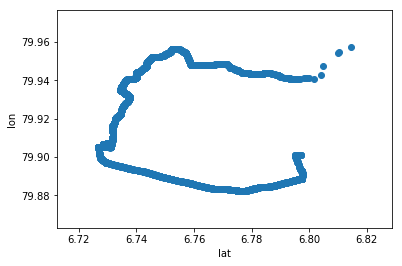

In [726]:
x = raw_data['lat']
y = raw_data['lon']

plt.scatter(x,y)
plt.xlabel("lat")
plt.ylabel("lon")
plt.show()

In [727]:
db.core_sample_indices_

array([   5,    6,   10, ..., 5985, 5986, 5988], dtype=int64)

In [728]:
result = raw_data
result['cluster'] = db.labels_
result = result.iloc[db.core_sample_indices_]
result.head()

,anomaly,lat,lon,cluster
5,A,6.751562,79.954525,0
6,A,6.751562,79.954525,0
10,A,6.745232,79.951666,1
37,A,6.740870,79.944298,2
38,A,6.740786,79.944269,3


In [729]:
result.shape

(2371, 4)

In [730]:
result['cluster'].describe()

count    2371.000000
mean       71.544496
std        44.718208
min         0.000000
25%        44.000000
50%        45.000000
75%       106.000000
max       184.000000
Name: cluster, dtype: float64

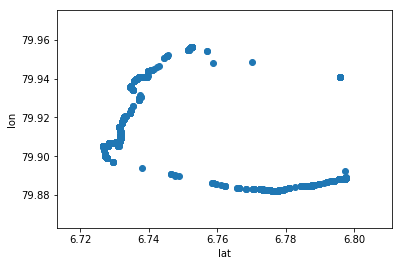

In [731]:
x = result['lat']
y = result['lon']
c = result['cluster']

#plt.scatter(x,y,c)
plt.scatter(x,y,label=c)
plt.xlabel("lat")
plt.ylabel("lon")
plt.show()

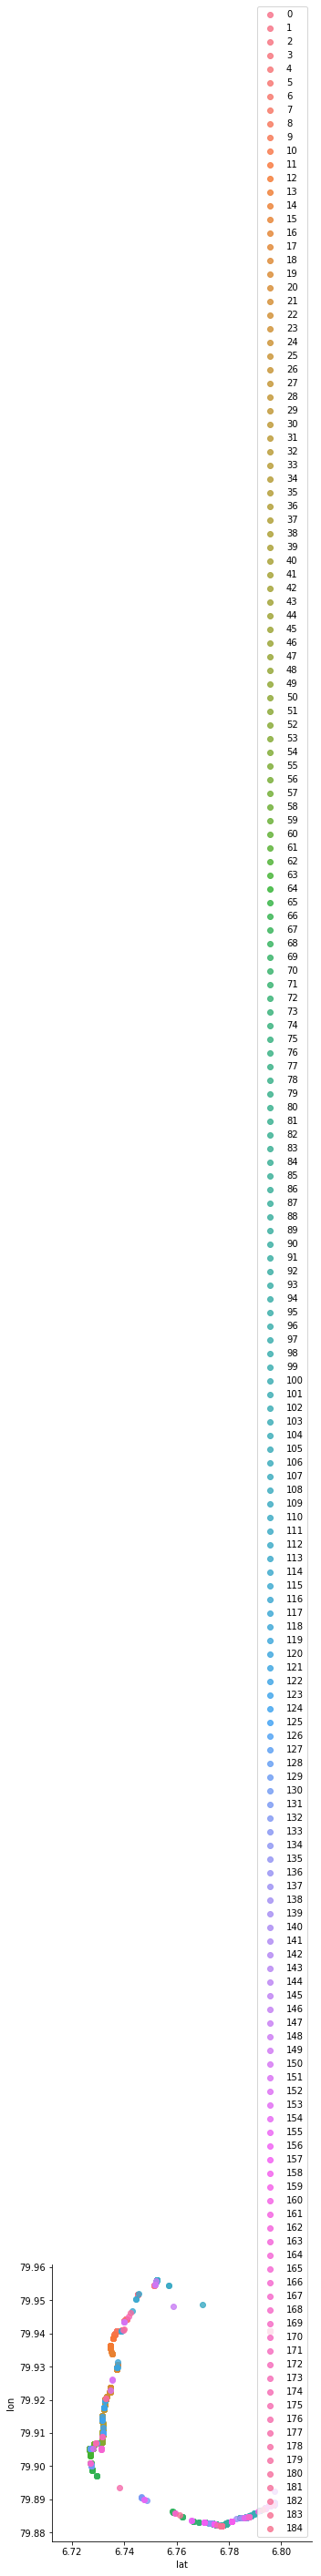

In [732]:
import seaborn as sns
#df = sns.load_dataset('iris')
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="lat", y="lon", data=result, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')


In [733]:
result.to_json("Clustered_Data/dilum_sir_route_without_duplications_radius_5_samplesize_5_Fourier.json", orient='records')